In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [2]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [3]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-3-4f213573676c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")


In [4]:
news_df

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,well sure about story seem biased what disagree with your statement that media ruin israels reputation that rediculous media most israeli media world having lived europe realize that incidences su...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that wil...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",although realize that principle your strongest points would still like know question this sort about arab countries want continue this think tank charade yours your fixation israel must stop might...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",notwithstanding legitimate fuss about this proposal much change last product this area priced over suspect clipper phones will came customer with automatically preregistered with government author...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",well will have change scoring playoff pool unfortunately have time right will certainly post scoring rules tomorrow does matter enter anyway good keith keller rangers quakers kkeller mail upenn le...
...,...,...
11309,"Danny Rubenstein, an Israeli journalist, will be speaking tonight \n(Wednesday, 7:30 pm) on the messy subject of politics in Israel.\nHe is speaking at Hillel on the U.C. Berkeley campus. The tal...",danny rubenstein israeli journalist will speaking tonight wednesday messy subject politics israel speaking hillel berkeley campus talk sponsored berkeley israel action committee
11310,\n,
11311,\nI agree. Home runs off Clemens are always memorable. Kinda like\neclipses and hurricanes. They don't happen very often.,agree home runs clemens always memorable kinda like eclipses hurricanes they happen very often
11312,"I used HP DeskJet with Orange Micros Grappler LS on System6.0.5.\n\nBut now I update system 6.0.5 to System7 with Kanji-Talk 7.1,\nthen I can not print by my DeskJet.\n\nIs the Grappler LS old ?\n...",used deskjet with orange micros grappler system update system system with kanji talk then print deskjet grappler deskjet system please tell deskjet system thank


In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [6]:
news_df

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,well sure story seem biased disagree statement media ruin israels reputation rediculous media israeli media world lived europe realize incidences described letter occured media whole seem ignore s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgrou...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",although realize principle strongest points would still like know question sort arab countries want continue think tank charade fixation israel must stop might start asking sort questions arab cou...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",notwithstanding legitimate fuss proposal much change last product area priced suspect clipper phones came customer automatically preregistered government authorities thus aside attempting legitimi...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",well change scoring playoff pool unfortunately time right certainly post scoring rules tomorrow matter enter anyway good keith keller rangers quakers kkeller mail upenn league champs
...,...,...
11309,"Danny Rubenstein, an Israeli journalist, will be speaking tonight \n(Wednesday, 7:30 pm) on the messy subject of politics in Israel.\nHe is speaking at Hillel on the U.C. Berkeley campus. The tal...",danny rubenstein israeli journalist speaking tonight wednesday messy subject politics israel speaking hillel berkeley campus talk sponsored berkeley israel action committee
11310,\n,
11311,\nI agree. Home runs off Clemens are always memorable. Kinda like\neclipses and hurricanes. They don't happen very often.,agree home runs clemens always memorable kinda like eclipses hurricanes happen often
11312,"I used HP DeskJet with Orange Micros Grappler LS on System6.0.5.\n\nBut now I update system 6.0.5 to System7 with Kanji-Talk 7.1,\nthen I can not print by my DeskJet.\n\nIs the Grappler LS old ?\n...",used deskjet orange micros grappler system update system system kanji talk print deskjet grappler deskjet system please tell deskjet system thank


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [8]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [9]:
terms = vectorizer.get_feature_names()
topics=[]

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    string = "Topic "+str(i)+": "
    for t in sorted_terms:
        string = string + t[0] + ' '
        
    topics.append(string)


In [12]:
for i in topics:
    print(i)

Topic 0: like know people think good time thanks 
Topic 1: thanks windows card drive mail file advance 
Topic 2: game team year games season players good 
Topic 3: drive scsi disk hard card drives problem 
Topic 4: windows file window files program using problem 
Topic 5: government chip mail space information encryption data 
Topic 6: like bike know chip sounds looks look 
Topic 7: card sale video offer monitor price jesus 
Topic 8: know card chip video government people clipper 
Topic 9: good know time bike jesus problem work 
Topic 10: think chip good thanks clipper need encryption 
Topic 11: thanks right problem good bike time window 
Topic 12: good people windows know file sale files 
Topic 13: space think know nasa problem year israel 
Topic 14: space good card people time nasa thanks 
Topic 15: people problem window time game want bike 
Topic 16: time bike right windows file need really 
Topic 17: time problem file think israel long mail 
Topic 18: file need card files problem r

In [10]:
dataset.target

array([17,  0, 17, ...,  9,  4,  9])

^C


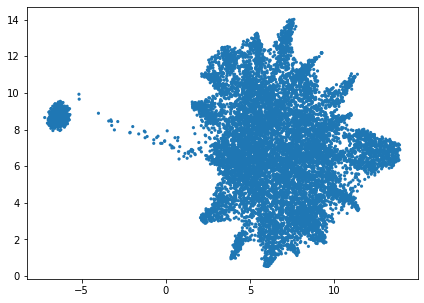

In [11]:
!pip uninstall umap
!pip install umap-learn
import umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
#c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()